# Preprocessing for Segmentation

## Data Augmentation

<br />

"albu/albumentations"


https://github.com/albu/albumentations/blob/master/notebooks/example_kaggle_salt.ipynb

In [14]:
import glob

import cv2
import numpy as np
from albumentations import (CLAHE, CenterCrop, Compose, Crop, ElasticTransform,
                            GridDistortion, HorizontalFlip, OneOf,
                            OpticalDistortion, PadIfNeeded,
                            RandomBrightnessContrast, RandomGamma,
                            RandomRotate90, RandomSizedCrop, Transpose,
                            VerticalFlip)
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
# Definition for visualizing augmented results


def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18

    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)

        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)

        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)

        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

In [16]:
# Create a list of paths of train images

image_path = "new_dataset/train/rwanda/image/"
label_path = "new_dataset/train/rwanda/label/"

img_path_list = []
lbl_path_list = []
for i in range(50):
    # Image
    path = image_path + str(i) + ".png"
    img_path_list.append(path)
    # Label
    path = label_path + str(i) + ".png"
    lbl_path_list.append(path)

In [17]:
# Check

img_path_list

['new_dataset/train/rwanda/image/0.png',
 'new_dataset/train/rwanda/image/1.png',
 'new_dataset/train/rwanda/image/2.png',
 'new_dataset/train/rwanda/image/3.png',
 'new_dataset/train/rwanda/image/4.png',
 'new_dataset/train/rwanda/image/5.png',
 'new_dataset/train/rwanda/image/6.png',
 'new_dataset/train/rwanda/image/7.png',
 'new_dataset/train/rwanda/image/8.png',
 'new_dataset/train/rwanda/image/9.png',
 'new_dataset/train/rwanda/image/10.png',
 'new_dataset/train/rwanda/image/11.png',
 'new_dataset/train/rwanda/image/12.png',
 'new_dataset/train/rwanda/image/13.png',
 'new_dataset/train/rwanda/image/14.png',
 'new_dataset/train/rwanda/image/15.png',
 'new_dataset/train/rwanda/image/16.png',
 'new_dataset/train/rwanda/image/17.png',
 'new_dataset/train/rwanda/image/18.png',
 'new_dataset/train/rwanda/image/19.png',
 'new_dataset/train/rwanda/image/20.png',
 'new_dataset/train/rwanda/image/21.png',
 'new_dataset/train/rwanda/image/22.png',
 'new_dataset/train/rwanda/image/23.png',
 '

In [18]:
lbl_path_list

['new_dataset/train/rwanda/label/0.png',
 'new_dataset/train/rwanda/label/1.png',
 'new_dataset/train/rwanda/label/2.png',
 'new_dataset/train/rwanda/label/3.png',
 'new_dataset/train/rwanda/label/4.png',
 'new_dataset/train/rwanda/label/5.png',
 'new_dataset/train/rwanda/label/6.png',
 'new_dataset/train/rwanda/label/7.png',
 'new_dataset/train/rwanda/label/8.png',
 'new_dataset/train/rwanda/label/9.png',
 'new_dataset/train/rwanda/label/10.png',
 'new_dataset/train/rwanda/label/11.png',
 'new_dataset/train/rwanda/label/12.png',
 'new_dataset/train/rwanda/label/13.png',
 'new_dataset/train/rwanda/label/14.png',
 'new_dataset/train/rwanda/label/15.png',
 'new_dataset/train/rwanda/label/16.png',
 'new_dataset/train/rwanda/label/17.png',
 'new_dataset/train/rwanda/label/18.png',
 'new_dataset/train/rwanda/label/19.png',
 'new_dataset/train/rwanda/label/20.png',
 'new_dataset/train/rwanda/label/21.png',
 'new_dataset/train/rwanda/label/22.png',
 'new_dataset/train/rwanda/label/23.png',
 '

In [19]:
# Set a shape

image_size = 256

### 2nd Try

In [20]:
aug = Compose([
    HorizontalFlip(p=0.5),
    VerticalFlip(p=0.5),
    RandomRotate90(p=0.5)])

In [21]:
# Augmentation

for i, (image_path, label_path) in enumerate(zip(img_path_list, lbl_path_list)):
    image = Image.open(image_path)
    mask = Image.open(label_path)
    image = image.convert("RGB")
    mask = mask.convert("RGB")
    image = image.resize((image_size, image_size))
    mask = mask.resize((image_size, image_size))
    image = np.asarray(image)
    mask = np.asarray(mask)
    for j in range(5):
        augmented = aug(image=image, mask=mask)
        image = augmented['image']
        mask = augmented['mask']
        Image.fromarray(image).save(
            'new_dataset/train/rwanda/augmentation2/image/' + str(i) + "-" + str(j) + ".png")
        Image.fromarray(mask).save(
            'new_dataset/train/rwanda/augmentation2/label/' + str(i) + "-" + str(j) + ".png")

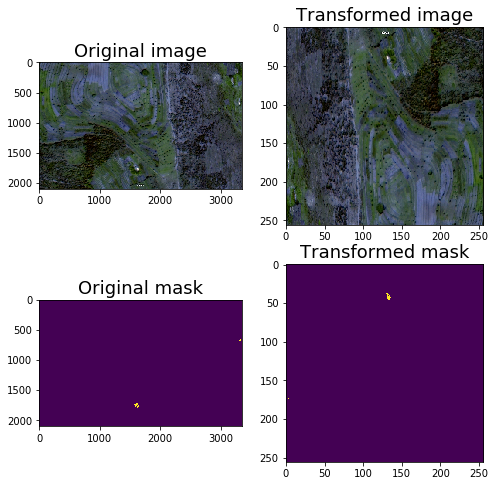

In [22]:
# Check the results

image = cv2.imread('new_dataset/train/rwanda/image/0.png')
mask = cv2.imread('new_dataset/train/rwanda/label/0.png', 0)
image_aug = cv2.imread('new_dataset/train/rwanda/augmentation2/image/0-0.png')
mask_aug = cv2.imread(
    'new_dataset/train/rwanda/augmentation2/label/0-0.png', 0)

visualize(image_aug, mask_aug,
          original_image=image, original_mask=mask)